In [1]:
import random

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

max_iter_num = 5 # 模拟的次数
G = nx.karate_club_graph() # 空手道俱乐部

for edge in G.edges:
    G.add_edge(edge[0], edge[1], weight=random.uniform(0,1)) # 可不可以作为权值 病毒的感染能力
for node in G:
    G.add_node(node, state = 0) # 用state标识状态 state=0 未感染，state=1 激活

seed = 33 # 选定33作为传染源
G.node[seed]['state'] = 1 # 表示33是感染的

all_infect_nodes = [] # 所有被感染的节点放在这里
all_infect_nodes.append(seed)
res = [[seed]]

# infected_graph = nx.Graph() # 被激活的图
# infected_graph.add_node(seed)

for i in range(max_iter_num):
    new_infect = list() # 新被感染的
    t1 = '%s time' % i + ' %s nodes' % len(all_infect_nodes)
    print(t1) # 当前有多少个节点被感染
    
    # 画图
    # plt.title(t1)
    # nx.draw(infected_graph, with_labels=True)
    # plt.show()

    # 感染的机会不止一次
    for v in all_infect_nodes:
        for nbr in G.neighbors(v):
            if G.node[nbr]['state'] == 0: # 如果这个邻居节点没被感染
                edge_data = G.get_edge_data(v, nbr)
                if random.uniform(0, 1) < edge_data['weight']:
                    G.node[nbr]['state'] = 1
                    new_infect.append(nbr)
                    # infected_graph.add_edge(v, nbr) # 画图 添加边
    res.append(new_infect)
    all_infect_nodes.extend(new_infect) # 将新感染的添加到
    print('all_active_nodes:', all_infect_nodes)

res = [c for c in res if c]
pos = nx.spring_layout(G) # 节点的布局为spring型
nx.draw(G,pos, with_labels=True, node_color='w', node_shape = '.')
color_list = ['brown','orange','r','g','b','y','m','gray','black','c','pink','brown','orange','r','g','b','y','m','gray','black','c','pink']
for i in range(len(res)):
    nx.draw_networkx_nodes(G, pos, with_labels=True, node_color=color_list[i], nodelist=res[i])
plt.show()


0 time 1 nodes
all_active_nodes: [33, 13, 14, 19, 20, 22, 26, 31, 32]
1 time 9 nodes
all_active_nodes: [33, 13, 14, 19, 20, 22, 26, 31, 32, 8, 0, 25, 28, 2, 18]
2 time 15 nodes
all_active_nodes: [33, 13, 14, 19, 20, 22, 26, 31, 32, 8, 0, 25, 28, 2, 18, 23, 29, 24, 30, 1, 3, 4, 5, 6, 21, 9]
3 time 26 nodes
all_active_nodes: [33, 13, 14, 19, 20, 22, 26, 31, 32, 8, 0, 25, 28, 2, 18, 23, 29, 24, 30, 1, 3, 4, 5, 6, 21, 9, 27, 10, 11, 7, 12, 16]
4 time 32 nodes
all_active_nodes: [33, 13, 14, 19, 20, 22, 26, 31, 32, 8, 0, 25, 28, 2, 18, 23, 29, 24, 30, 1, 3, 4, 5, 6, 21, 9, 27, 10, 11, 7, 12, 16]


<Figure size 640x480 with 1 Axes>

0 time 1 nodes


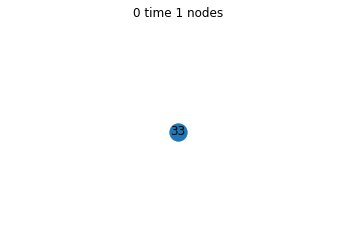

all_active_nodes: [33, 8, 13, 14, 15, 18, 23, 26, 28, 29, 31]
1 time 11 nodes


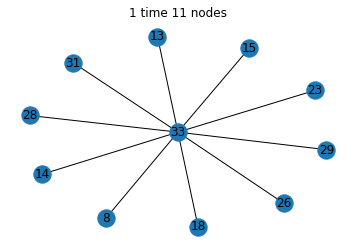

all_active_nodes: [33, 8, 13, 14, 15, 18, 23, 26, 28, 29, 31, 9, 20, 22, 32, 0, 1, 27, 24, 25]
2 time 20 nodes


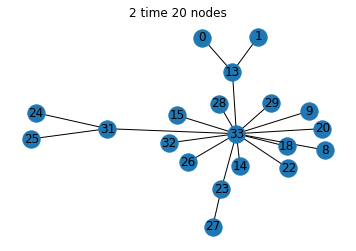

all_active_nodes: [33, 8, 13, 14, 15, 18, 23, 26, 28, 29, 31, 9, 20, 22, 32, 0, 1, 27, 24, 25, 30, 3, 2, 6, 7, 10, 19, 21, 17]
3 time 29 nodes


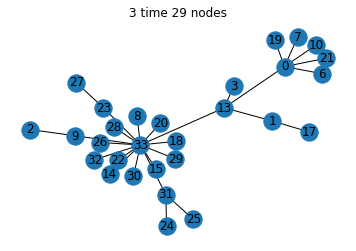

all_active_nodes: [33, 8, 13, 14, 15, 18, 23, 26, 28, 29, 31, 9, 20, 22, 32, 0, 1, 27, 24, 25, 30, 3, 2, 6, 7, 10, 19, 21, 17, 12, 4, 5, 16]
4 time 33 nodes


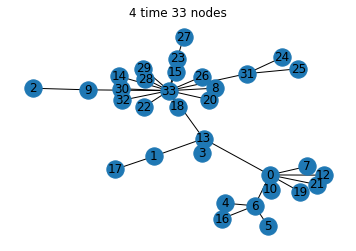

all_active_nodes: [33, 8, 13, 14, 15, 18, 23, 26, 28, 29, 31, 9, 20, 22, 32, 0, 1, 27, 24, 25, 30, 3, 2, 6, 7, 10, 19, 21, 17, 12, 4, 5, 16]


In [2]:
import random

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

max_iter_num = 5 # 模拟的次数
G = nx.karate_club_graph() # 空手道俱乐部

for edge in G.edges:
    G.add_edge(edge[0], edge[1], weight=random.uniform(0,1)) # 可不可以作为权值 病毒的感染能力
for node in G:
    G.add_node(node, state = 0) # 用state标识状态 state=0 未激活，state=1 激活

seed = 33 # 选定33作为传染源
G.nodes[seed]['state'] = 1 # 表示33是感染的

all_infect_nodes = [] # 所有被感染的节点放在这里
all_infect_nodes.append(seed)

infected_graph = nx.Graph() # 被激活的图
infected_graph.add_node(seed)

for i in range(max_iter_num):
    new_infect = list() # 新被感染的
    t1 = '%s time' % i + ' %s nodes' % len(all_infect_nodes)
    print(t1) # 当前有多少个节点被感染
    
    # 画图
    plt.title(t1)
    nx.draw(infected_graph, with_labels=True)
    plt.show()

    # 感染的机会不止一次
    for v in all_infect_nodes:
        for nbr in G.neighbors(v):
            if G.nodes[nbr]['state'] == 0: # 如果这个邻居节点没被感染
                edge_data = G.get_edge_data(v, nbr)
                if random.uniform(0, 1) < edge_data['weight']:
                    G.nodes[nbr]['state'] = 1
                    new_infect.append(nbr)
                    infected_graph.add_edge(v, nbr) # 画图 添加边
    
    all_infect_nodes.extend(new_infect) # 将新感染的添加到
    print('all_active_nodes:', all_infect_nodes)


0 time 1 nodes
激活 [8, 9, 13, 15, 19, 27, 29, 32]
all_active_nodes [33, 8, 9, 13, 15, 19, 27, 29, 32]
1 time 9 nodes
激活 [2, 30, 1, 3, 23, 24, 26, 31]
all_active_nodes [33, 8, 9, 13, 15, 19, 27, 29, 32, 2, 30, 1, 3, 23, 24, 26, 31]
2 time 17 nodes
激活 [7, 28, 0, 17, 21, 25]
all_active_nodes [33, 8, 9, 13, 15, 19, 27, 29, 32, 2, 30, 1, 3, 23, 24, 26, 31, 7, 28, 0, 17, 21, 25]
3 time 23 nodes
激活 [4, 5, 10, 11, 12]
all_active_nodes [33, 8, 9, 13, 15, 19, 27, 29, 32, 2, 30, 1, 3, 23, 24, 26, 31, 7, 28, 0, 17, 21, 25, 4, 5, 10, 11, 12]
4 time 28 nodes
激活 [6, 16]
all_active_nodes [33, 8, 9, 13, 15, 19, 27, 29, 32, 2, 30, 1, 3, 23, 24, 26, 31, 7, 28, 0, 17, 21, 25, 4, 5, 10, 11, 12, 6, 16]
5 time 30 nodes
激活 []
all_active_nodes [33, 8, 9, 13, 15, 19, 27, 29, 32, 2, 30, 1, 3, 23, 24, 26, 31, 7, 28, 0, 17, 21, 25, 4, 5, 10, 11, 12, 6, 16]
6 time 30 nodes
激活 []
all_active_nodes [33, 8, 9, 13, 15, 19, 27, 29, 32, 2, 30, 1, 3, 23, 24, 26, 31, 7, 28, 0, 17, 21, 25, 4, 5, 10, 11, 12, 6, 16]
7 time 30 n

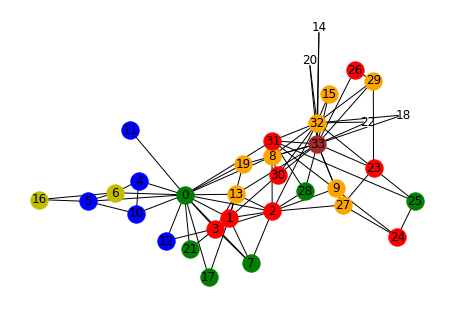

In [3]:
import random

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

max_iter_num = 10 # 模拟的次数
G = nx.karate_club_graph() # 空手道俱乐部

for edge in G.edges:
    G.add_edge(edge[0], edge[1], weight=random.uniform(0,1)) # 可不可以作为权值
for node in G:
    G.add_node(node, state = 0) # 用state标识状态 state=0 未激活，state=1 激活

seed = 33 # 选定33作为初始激活节点
G.nodes[seed]['state'] = 1 # 表示33被激活

# activated_graph = nx.Graph() # 被激活的图
# activated_graph.add_node(seed)

all_active_nodes = [] # 所有被激活的节点放在这里
all_active_nodes.append(seed)

start_influence_nodes = [] # 刚被激活的节点 即有影响力去影响别人的节点
start_influence_nodes.append(seed)

color_list = ['brown','orange','r','g','b','y','m','gray','black','c','pink','brown','orange','r','g','b','y','m','gray','black','c','pink']
res = [[seed]]
for i in range(max_iter_num):
    new_active = list()
    t1 = '%s time' % i + ' %s nodes' % len(all_active_nodes)
    print(t1) # 当前有多少个节点激活

    # 画图
    # plt.title(t1)
    # nx.draw(activated_graph, with_labels=True,node_color=color_list[i])
    # plt.show()

    for v in start_influence_nodes:
        for nbr in G.neighbors(v): 
            if G.nodes[nbr]['state'] == 0: # 如果这个邻居没被激活
                edge_data = G.get_edge_data(v, nbr)
                if random.uniform(0, 1) < edge_data['weight']:
                    G.nodes[nbr]['state'] = 1
                    new_active.append(nbr)
                    # activated_graph.add_edge(v, nbr) # 画图 添加边
    
    print('激活',new_active)
    start_influence_nodes.clear() # 将原先的有个影响力的清空
    start_influence_nodes.extend(new_active) # 将新被激活的节点添加到有影响力
    all_active_nodes.extend(new_active) # 将新被激活的节点添加到激活的列表中
    res.append(new_active)

    print('all_active_nodes',all_active_nodes) # 打印
# print(res)

res = [c for c in res if c]
pos = nx.spring_layout(G) # 节点的布局为spring型
nx.draw(G,pos, with_labels=True, node_color='w', node_shape = '.')
color_list = ['brown','orange','r','g','b','y','m','gray','black','c','pink','brown','orange','r','g','b','y','m','gray','black','c','pink']
for i in range(len(res)):
    nx.draw_networkx_nodes(G, pos, with_labels=True, node_color=color_list[i], nodelist=res[i])
plt.show()

